In [8]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical # For hot encoding y labels
import random
import matplotlib.pyplot as plt

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # loading the dataset from mnist

In [10]:
num_of_samples = [] # number of images of each label
num_classes = 10 # 10 digits from 0 to 9
cols = 5 

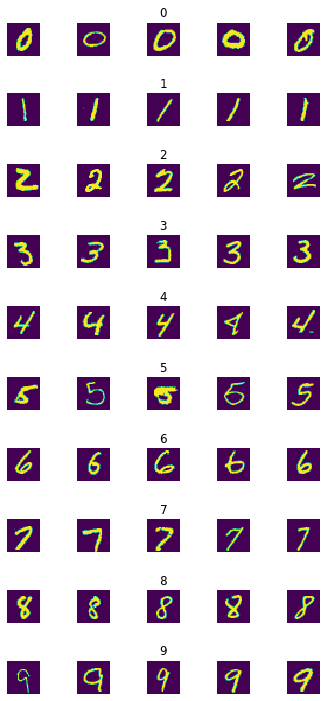

In [20]:
# Visualizing the data

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10)) # Creating grid
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1)])
        axs[j][i].axis('off')
        
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))       

In [21]:
# Hot encoding the data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
# Normalizing the dataset
X_train = X_train / 255
X_test = X_test/ 255

In [27]:
# Formatting the dataset
num_pixels = 28 * 28
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], num_pixels)

(60000, 784)


In [30]:
def create_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
model = create_model()
# Fitting the model
h = model.fit(x=X_train, y=y_train, verbose=1, validation_split=0.1, epochs=35, batch_size=200, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/35
54000/54000 [==============================] - 4s 65us/step - loss: 1.7173 - acc: 0.6017 - val_loss: 0.9914 - val_acc: 0.8225
Epoch 2/35
54000/54000 [==============================] - 3s 61us/step - loss: 0.7727 - acc: 0.8218 - val_loss: 0.5328 - val_acc: 0.8828
Epoch 3/35
54000/54000 [==============================] - 4s 68us/step - loss: 0.5200 - acc: 0.8688 - val_loss: 0.3912 - val_acc: 0.9058
Epoch 4/35
54000/54000 [==============================] - 4s 70us/step - loss: 0.4250 - acc: 0.8869 - val_loss: 0.3311 - val_acc: 0.9148
Epoch 5/35
54000/54000 [==============================] - 4s 81us/step - loss: 0.3769 - acc: 0.8967 - val_loss: 0.3003 - val_acc: 0.91987
Epoch 6/35
54000/54000 [==============================] - 3s 64us/step - loss: 0.3488 - acc: 0.9023 - val_loss: 0.2775 - val_acc: 0.9218
Epoch 7/35
54000/54000 [==============================] - 3s 55us/step - loss: 0.3299 - acc: 0.9068 - val_loss: 0.2625 - val_acc

Text(0.5, 0, 'epochs')

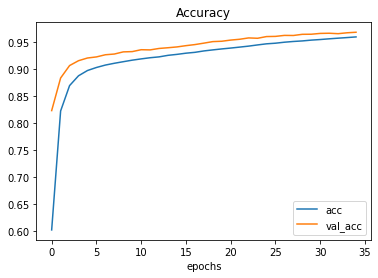

In [38]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epochs')